In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 参数选择范围
years = [2020, 2021, 2022]
ids = [50, 300, 500]
models = ["Attention", "CNN", "GRU", "preTCN", "FuturesNet"]

In [3]:
results_list = []

# 迭代所有的 year, id 和 model 组合
for year in years:
    for data_id in ids:
        for model in models:
            # 组合成文件路径
            dir_path = f"save/{year}_{data_id}/{model}"
            file_path = os.path.join(dir_path, "results.json")

            # 检查文件是否存在
            if os.path.exists(file_path):
                # 读取 json 文件
                with open(file_path, "r") as f:
                    data = json.load(f)

                # 提取指标，并添加模型信息
                results = {
                    "year": year,
                    "id": data_id,
                    "model": model,
                    "best_acc": data.get("best_acc"),
                    "mae": data.get("mae"),
                    "mse": data.get("mse"),
                    "rmse": data.get("rmse"),
                    "r2": data.get("r2"),
                    "val_loss": data.get("val_loss"),
                    "sharp_value": data.get("sharp_value")
                }

                results_list.append(results)

# 创建DataFrame并添加适合美化的格式
df = pd.DataFrame(results_list)

# 对表格进行美化，按年排序，并为CSV格式加入换行等处理
df = df.sort_values(by=['year', 'model', 'id']).reset_index(drop=True)

# 将美化后的DataFrame保存为CSV文件
output_csv = "model_summary.csv"
df.to_csv(output_csv, index=False)
print(f"Results have been written to {output_csv}")

Results have been written to model_summary.csv


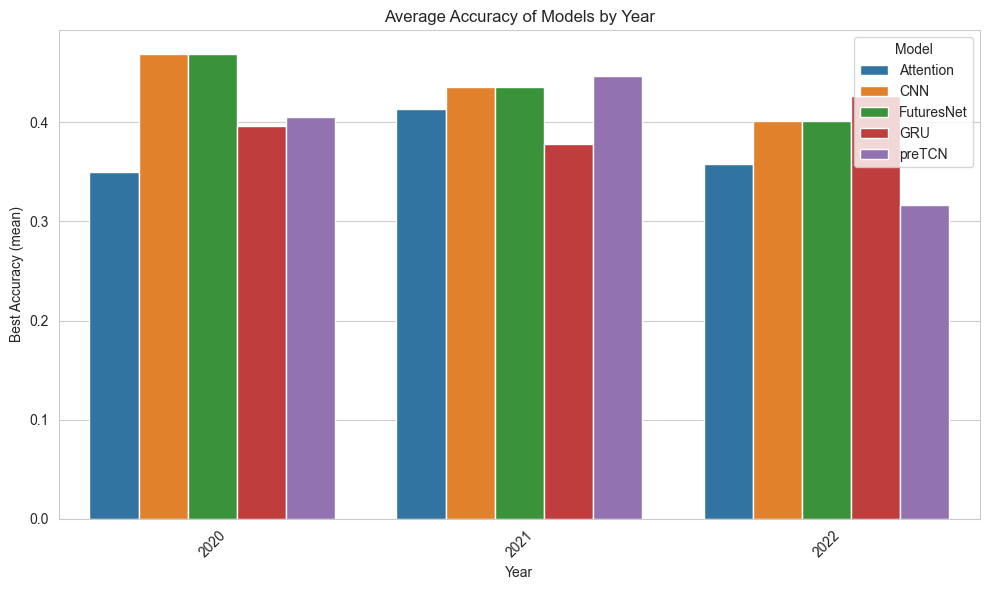

In [4]:
df_grouped = df.groupby(['year', 'model'])['best_acc'].mean().reset_index()

# 可视化：柱状图比较不同年份中不同模型的平均准确率
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="best_acc", hue="model", data=df_grouped)
plt.title("Average Accuracy of Models by Year")
plt.ylabel("Best Accuracy (mean)")
plt.xlabel("Year")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_by_year_model.png")
plt.show()

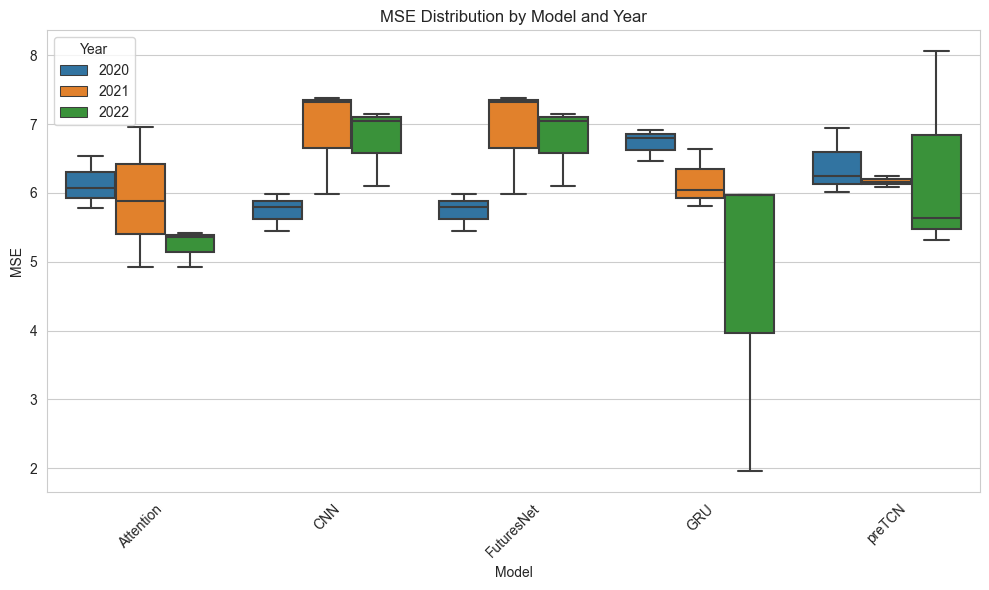

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y="mse", hue="year", data=df)
plt.title("MSE Distribution by Model and Year")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mse_distribution.png")
plt.show()


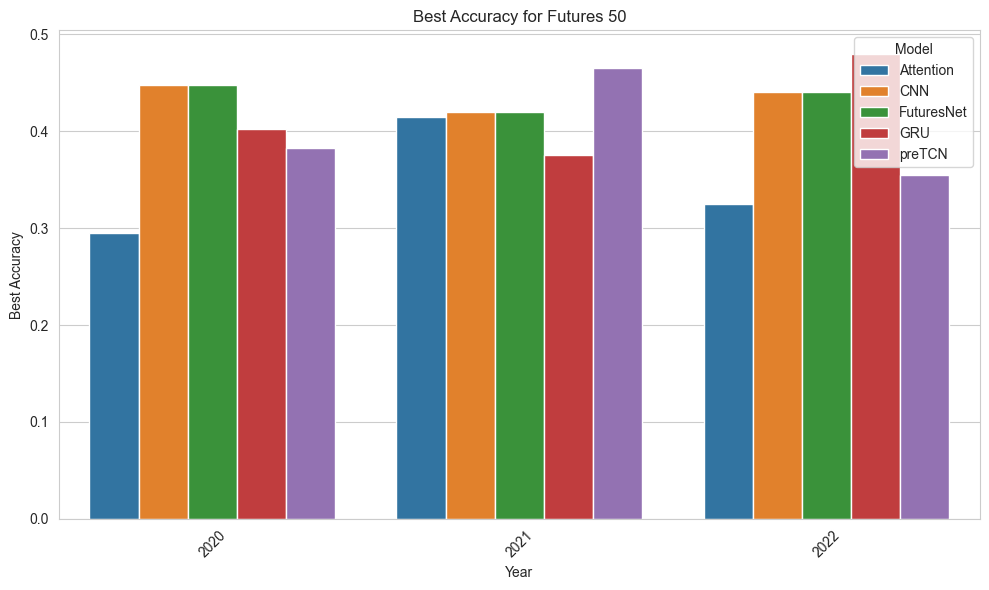

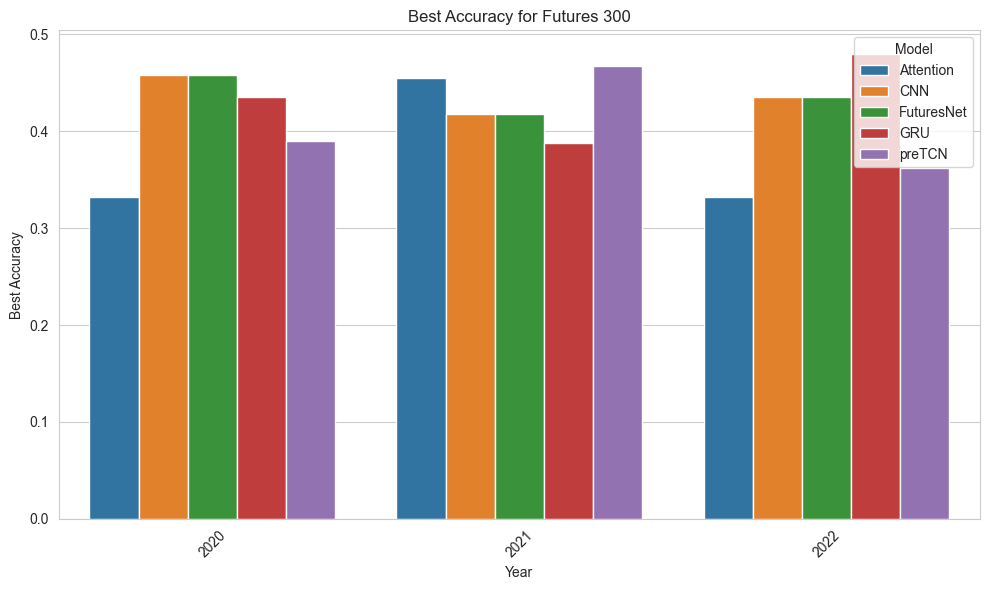

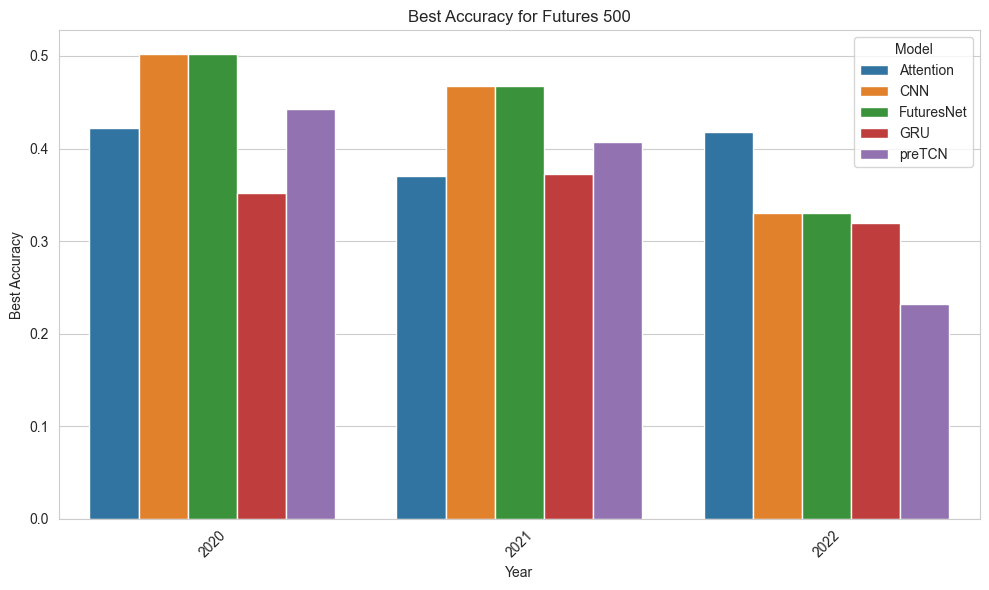

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 CSV 文件
df = pd.read_csv("model_summary.csv")

# 1. 分析不同期货的表现（50、300、500）
for data_id in [50, 300, 500]:
    df_id = df[df['id'] == data_id]
    
    # 柱状图：每年不同方法的平均准确率
    plt.figure(figsize=(10, 6))
    sns.barplot(x="year", y="best_acc", hue="model", data=df_id)
    plt.title(f"Best Accuracy for Futures {data_id}")
    plt.ylabel("Best Accuracy")
    plt.xlabel("Year")
    plt.legend(title="Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"accuracy_futures_{data_id}.png")
    plt.show()

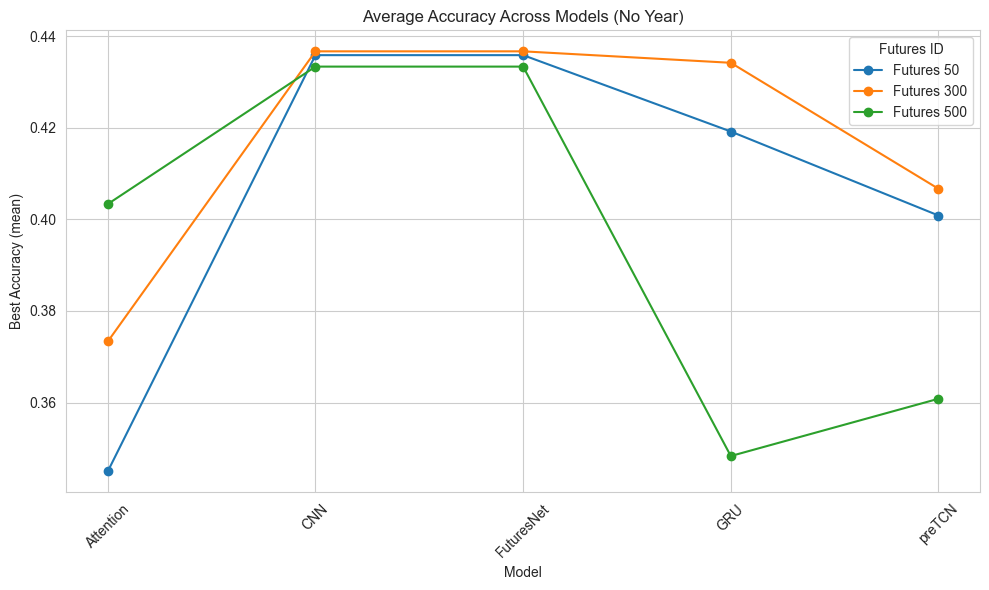

In [7]:
df_no_year = df.groupby(['id', 'model'])[['best_acc', 'mse', 'rmse']].mean().reset_index()

# 折线图：显示每个期货的平均准确率随不同方法的变化趋势
plt.figure(figsize=(10, 6))
for data_id in [50, 300, 500]:
    df_id = df_no_year[df_no_year['id'] == data_id]
    plt.plot(df_id['model'], df_id['best_acc'], label=f"Futures {data_id}", marker='o')

plt.title("Average Accuracy Across Models (No Year)")
plt.ylabel("Best Accuracy (mean)")
plt.xlabel("Model")
plt.legend(title="Futures ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_no_year.png")
plt.show()

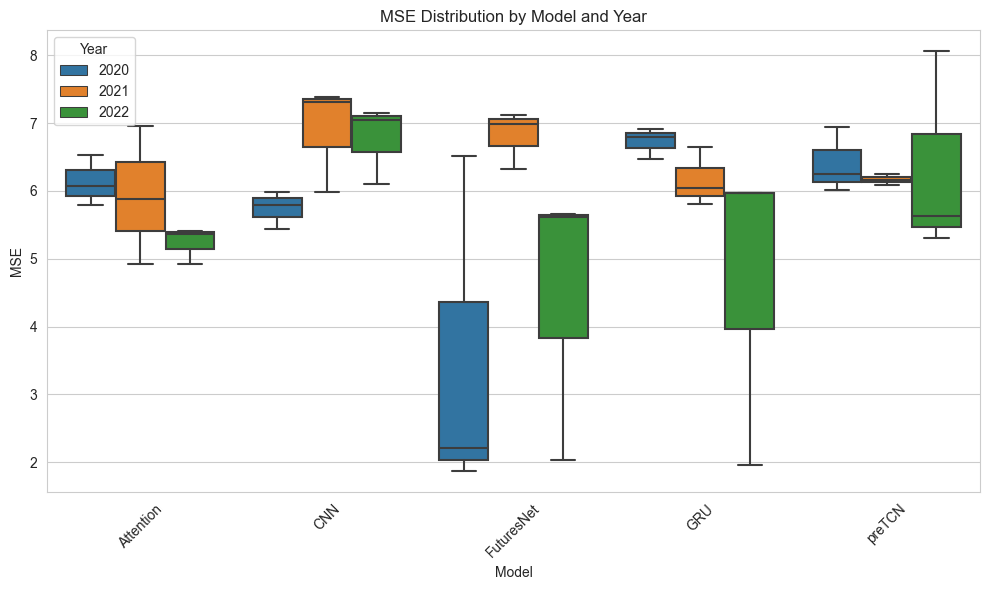

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y="mse", hue="year", data=df)
plt.title("MSE Distribution by Model and Year")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mse_distribution.png")
plt.show()

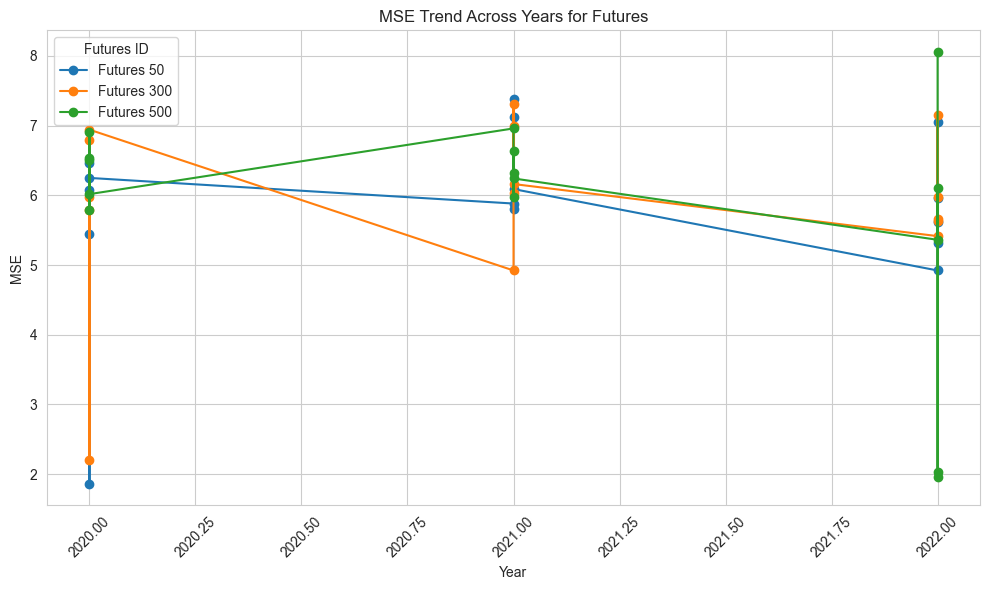

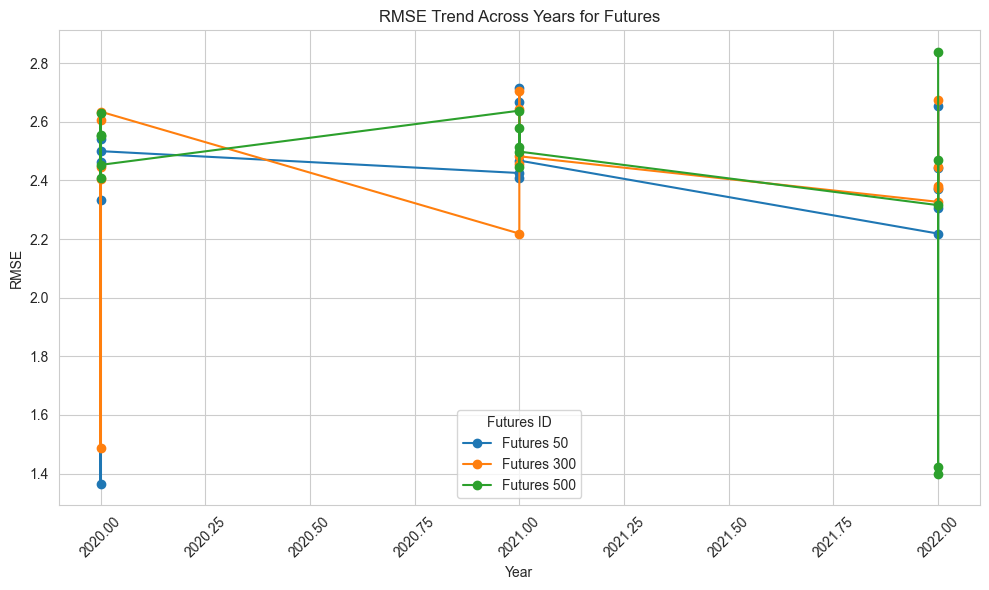

In [19]:
for metric in ['mse', 'rmse']:
    plt.figure(figsize=(10, 6))
    for data_id in [50, 300, 500]:
        df_id = df[df['id'] == data_id]
        plt.plot(df_id['year'], df_id[metric], label=f"Futures {data_id}", marker='o')
    
    plt.title(f"{metric.upper()} Trend Across Years for Futures")
    plt.ylabel(metric.upper())
    plt.xlabel("Year")
    plt.legend(title="Futures ID")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{metric}_trend.png")
    plt.show()

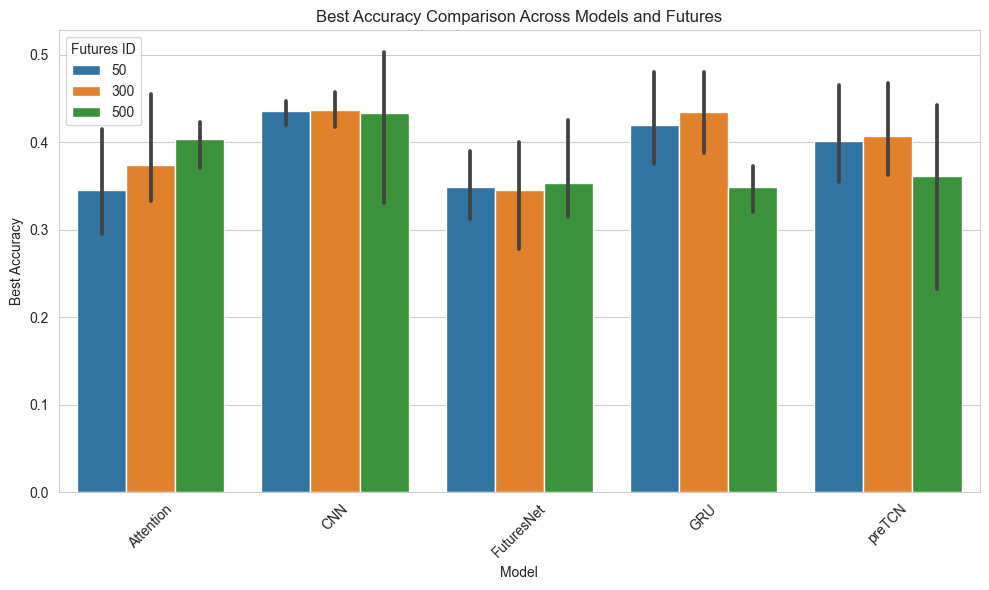

In [21]:
# 1. 柱状图：不同模型在不同期货上的平均准确率（Best Accuracy）
plt.figure(figsize=(10, 6))
sns.barplot(x="model", y="best_acc", hue="id", data=df)
plt.title("Best Accuracy Comparison Across Models and Futures")
plt.ylabel("Best Accuracy")
plt.xlabel("Model")
plt.legend(title="Futures ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("best_acc_comparison.png")
plt.show()

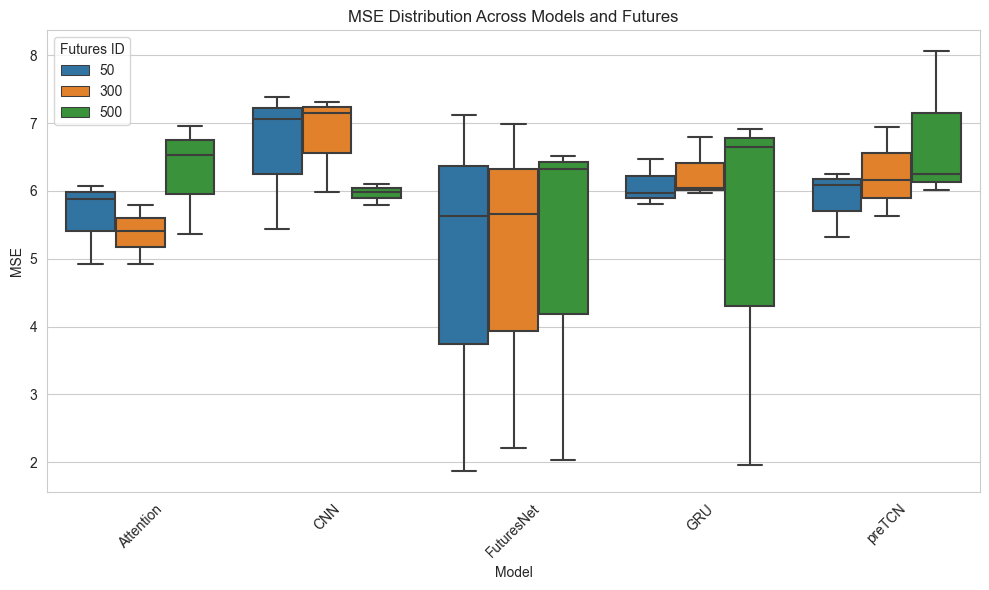

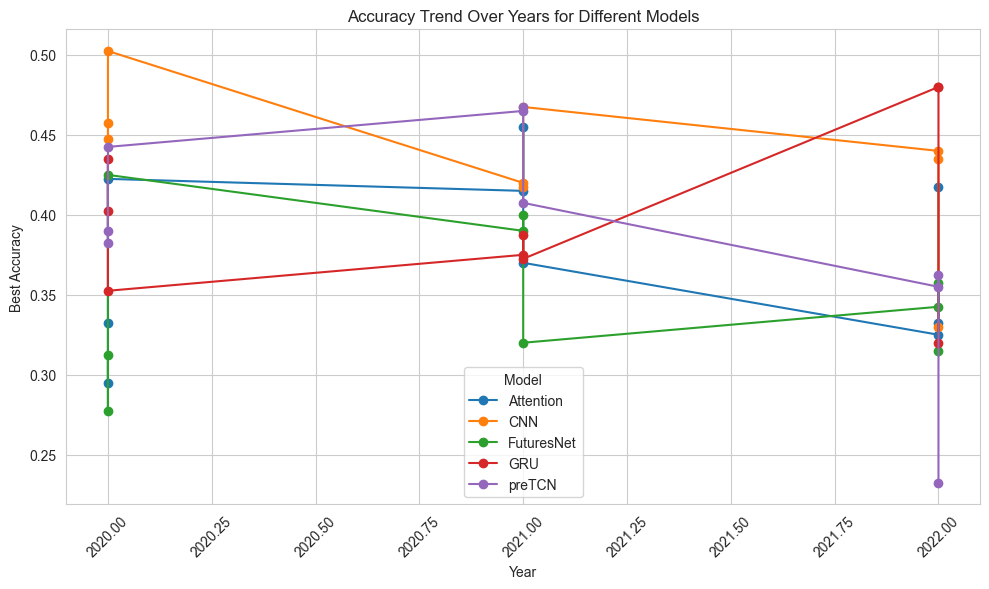

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y="mse", hue="id", data=df)
plt.title("MSE Distribution Across Models and Futures")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.legend(title="Futures ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("mse_distribution_comparison.png")
plt.show()

# 3. 准确率趋势折线图：随年份变化的模型表现
plt.figure(figsize=(10, 6))
for model in df['model'].unique():
    df_model = df[df['model'] == model]
    plt.plot(df_model['year'], df_model['best_acc'], label=model, marker='o')

plt.title("Accuracy Trend Over Years for Different Models")
plt.ylabel("Best Accuracy")
plt.xlabel("Year")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_trend.png")
plt.show()

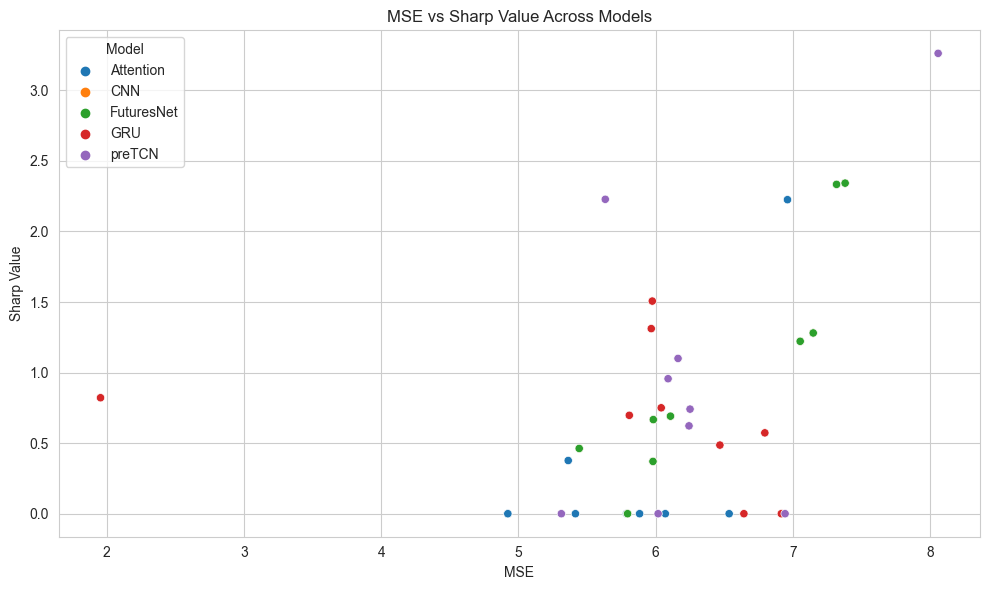

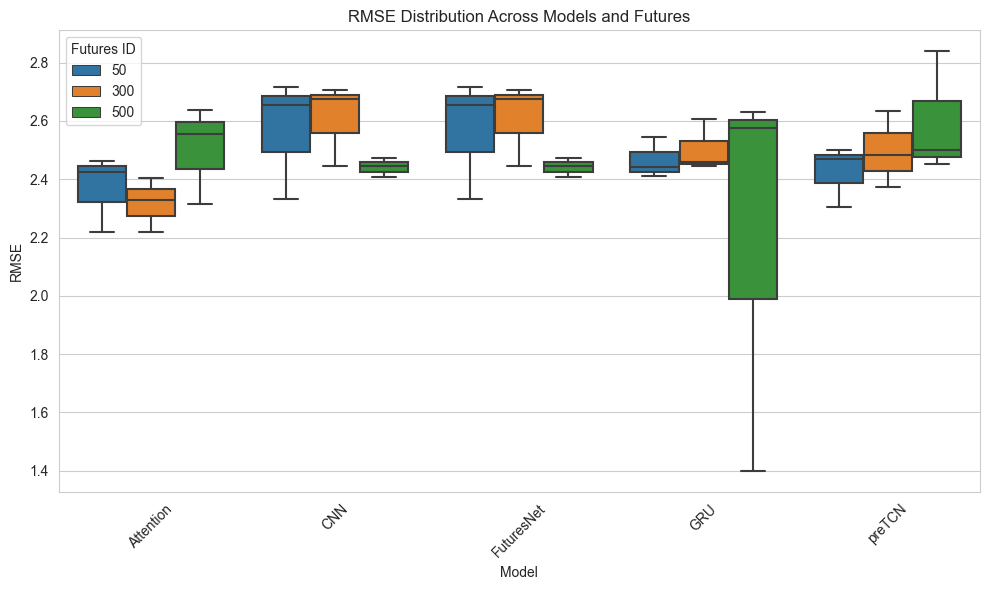

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="mse", y="sharp_value", hue="model", data=df)
plt.title("MSE vs Sharp Value Across Models")
plt.ylabel("Sharp Value")
plt.xlabel("MSE")
plt.legend(title="Model")
plt.tight_layout()
plt.savefig("mse_vs_sharp_value.png")
plt.show()

# 5. RMSE 箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y="rmse", hue="id", data=df)
plt.title("RMSE Distribution Across Models and Futures")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.legend(title="Futures ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rmse_distribution_comparison.png")
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 读取用户上传的 CSV 文件
file_path = "./model_summary.csv"
df = pd.read_csv(file_path)

# 确保模型顺序按照指定的顺序排列
model_order = ["GRU", "Attention", "preTCN", "FuturesNet"]


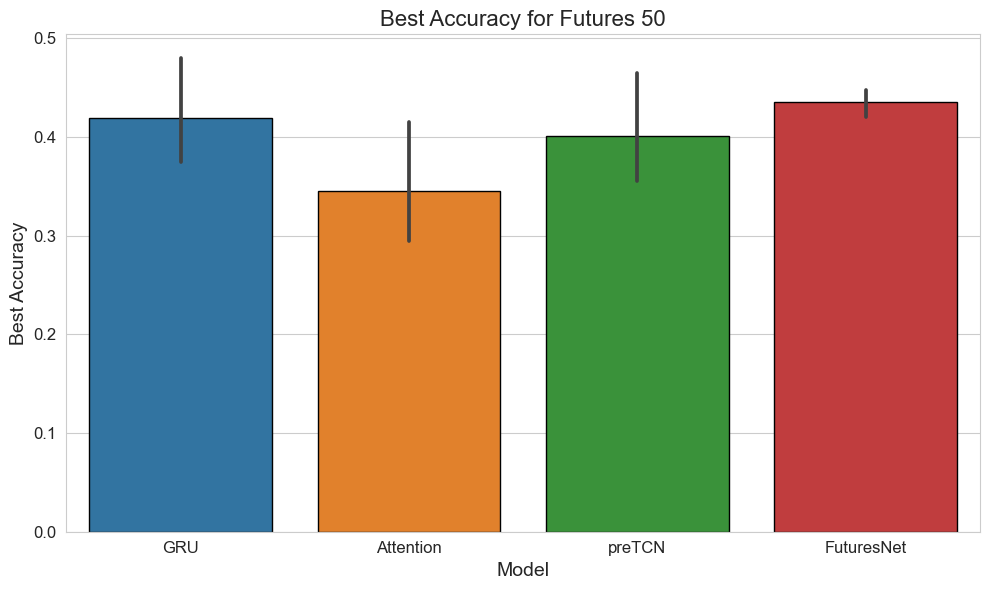

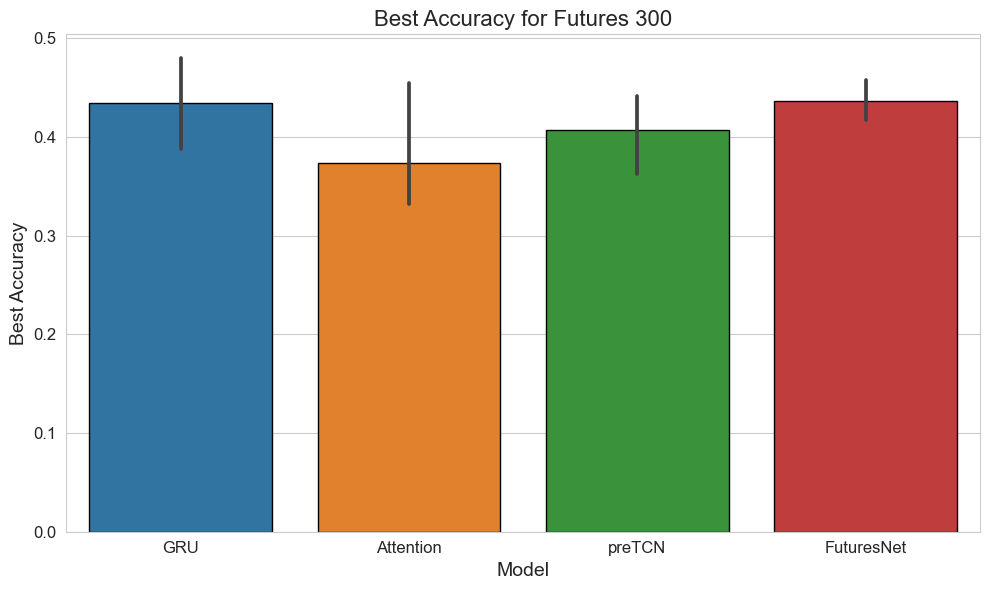

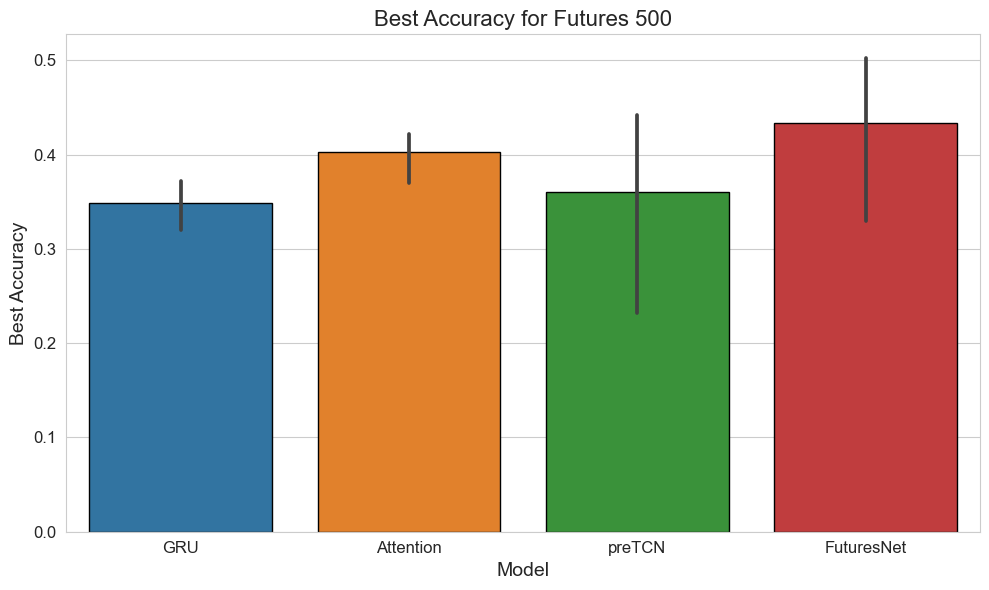

In [20]:
# 1. 不按年份归类：比较不同方法在每个期货上的表现
for data_id in [50, 300, 500]:
    df_id = df[df['id'] == data_id]
    
    # 绘制柱状图：不同模型在每只期货上的平均准确率
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y="best_acc", data=df_id, order=model_order, edgecolor='black')
    plt.title(f"Best Accuracy for Futures {data_id}", fontsize=16)
    plt.ylabel("Best Accuracy", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(f"best_acc_futures_{data_id}.png")
    plt.show()

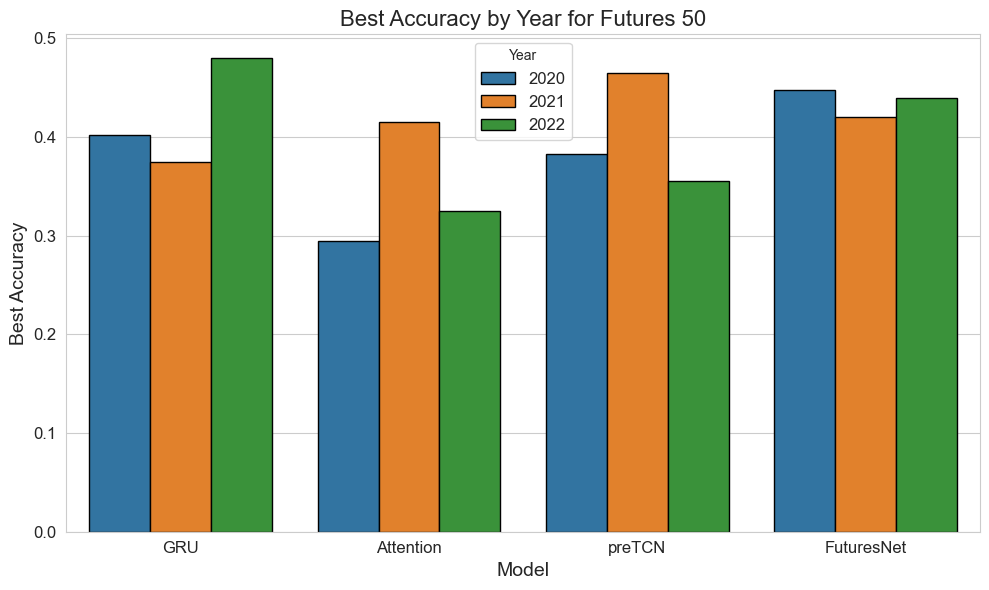

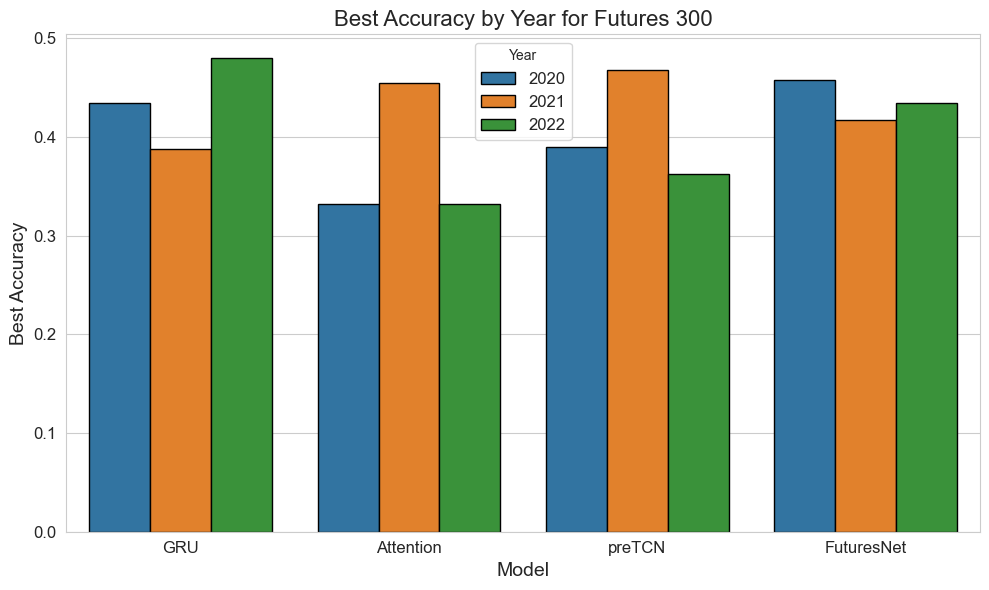

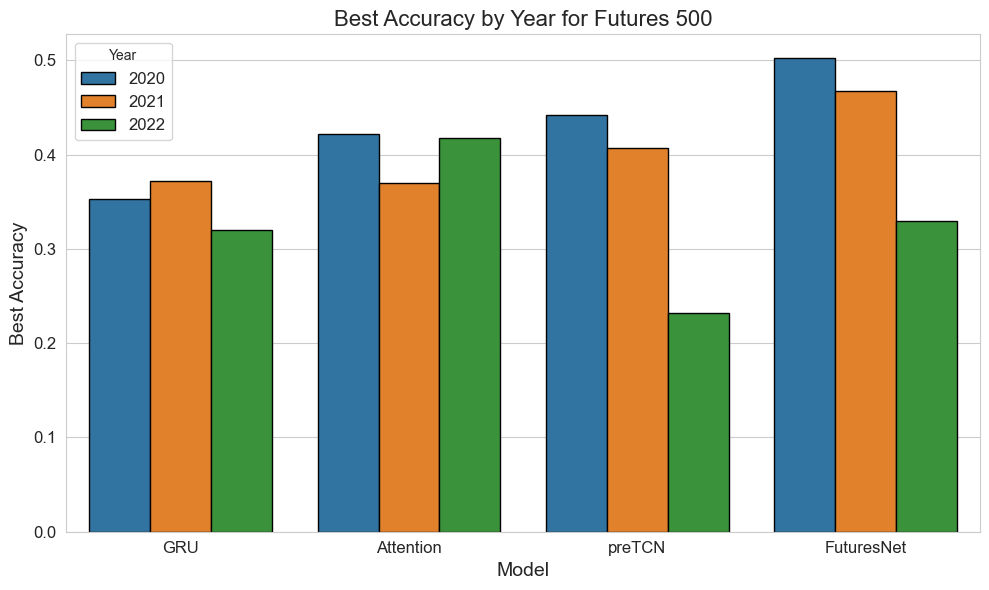

In [21]:
# 2. 按年份归类：比较不同年份中不同方法在每个期货上的表现
for data_id in [50, 300, 500]:
    df_id = df[df['id'] == data_id]
    
    # 绘制柱状图：按年份归类的准确率
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y="best_acc", hue="year", data=df_id, order=model_order, edgecolor='black')
    plt.title(f"Best Accuracy by Year for Futures {data_id}", fontsize=16)
    plt.ylabel("Best Accuracy", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"best_acc_year_futures_{data_id}.png")
    plt.show()

In [23]:
significance_results = {}

for model1 in model_order:
    for model2 in model_order:
        if model1 != model2:
            for data_id in [50, 300, 500]:
                df_id = df[df['id'] == data_id]
                mse_model1 = df_id[df_id['model'] == model1]['mse']
                mse_model2 = df_id[df_id['model'] == model2]['mse']
                
                # t-test显著性检验
                t_stat, p_value = stats.ttest_ind(mse_model1, mse_model2, equal_var=False)
                significance_results[(data_id, model1, model2)] = p_value

significance_results


{(50, 'GRU', 'Attention'): 0.34122240593332975,
 (300, 'GRU', 'Attention'): 0.0695967892184207,
 (500, 'GRU', 'Attention'): 0.5659398149135311,
 (50, 'GRU', 'preTCN'): 0.6089879322373868,
 (300, 'GRU', 'preTCN'): 0.9611363149792026,
 (500, 'GRU', 'preTCN'): 0.43254420517658615,
 (50, 'GRU', 'FuturesNet'): 0.4649071433008948,
 (300, 'GRU', 'FuturesNet'): 0.34296974126534413,
 (500, 'GRU', 'FuturesNet'): 0.6723697411354841,
 (50, 'Attention', 'GRU'): 0.34122240593332975,
 (300, 'Attention', 'GRU'): 0.0695967892184207,
 (500, 'Attention', 'GRU'): 0.5659398149135311,
 (50, 'Attention', 'preTCN'): 0.6031968382839548,
 (300, 'Attention', 'preTCN'): 0.1395327954828806,
 (500, 'Attention', 'preTCN'): 0.5799277944390908,
 (50, 'Attention', 'FuturesNet'): 0.2396820074147289,
 (300, 'Attention', 'FuturesNet'): 0.05409096556780854,
 (500, 'Attention', 'FuturesNet'): 0.5686140668570802,
 (50, 'preTCN', 'GRU'): 0.6089879322373868,
 (300, 'preTCN', 'GRU'): 0.9611363149792026,
 (500, 'preTCN', 'GRU'):

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings

# 忽略一些无关紧要的警告
warnings.filterwarnings('ignore')

# 读取数据
df = pd.read_csv("model_summary.csv")

# 只保留指定的模型，按照指定顺序排列
model_order = ["CNN", "Attention", "GRU", "preTCN", "FuturesNet"]
df = df[df['model'].isin(model_order)]
df['model'] = pd.Categorical(df['model'], categories=model_order, ordered=True)

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 定义颜色调色板，确保每次绘图颜色一致
palette = sns.color_palette("Set2", len(model_order))


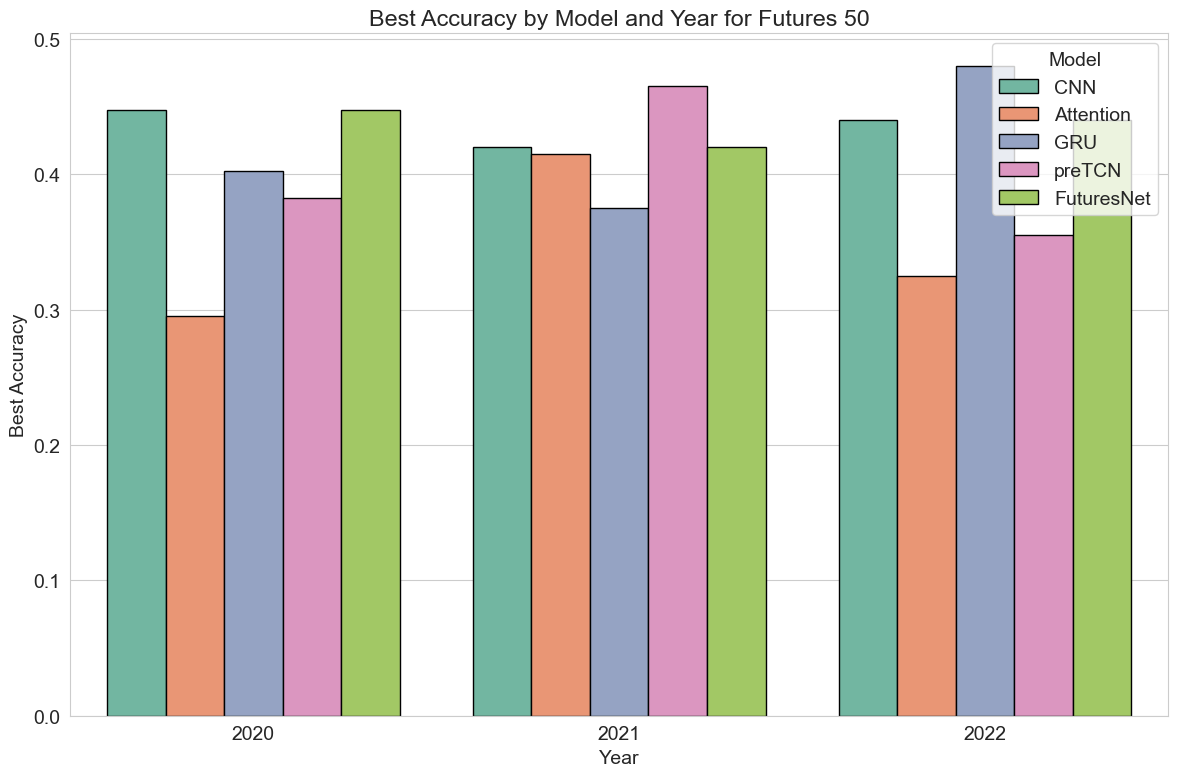

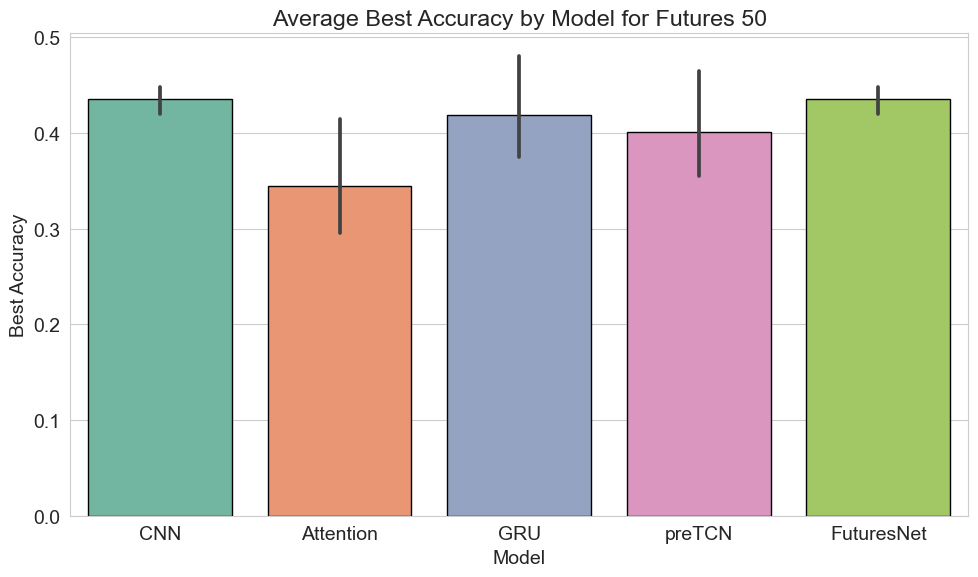

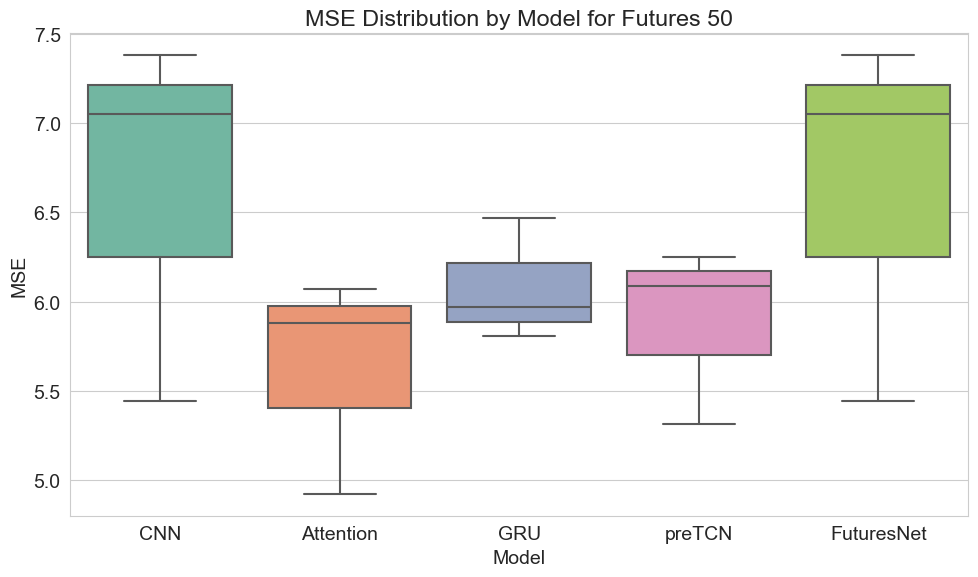

ANOVA result for Futures 50: F-statistic=2.02, p-value=0.1668
No significant difference found between models for Futures 50

--------------------------------------------------



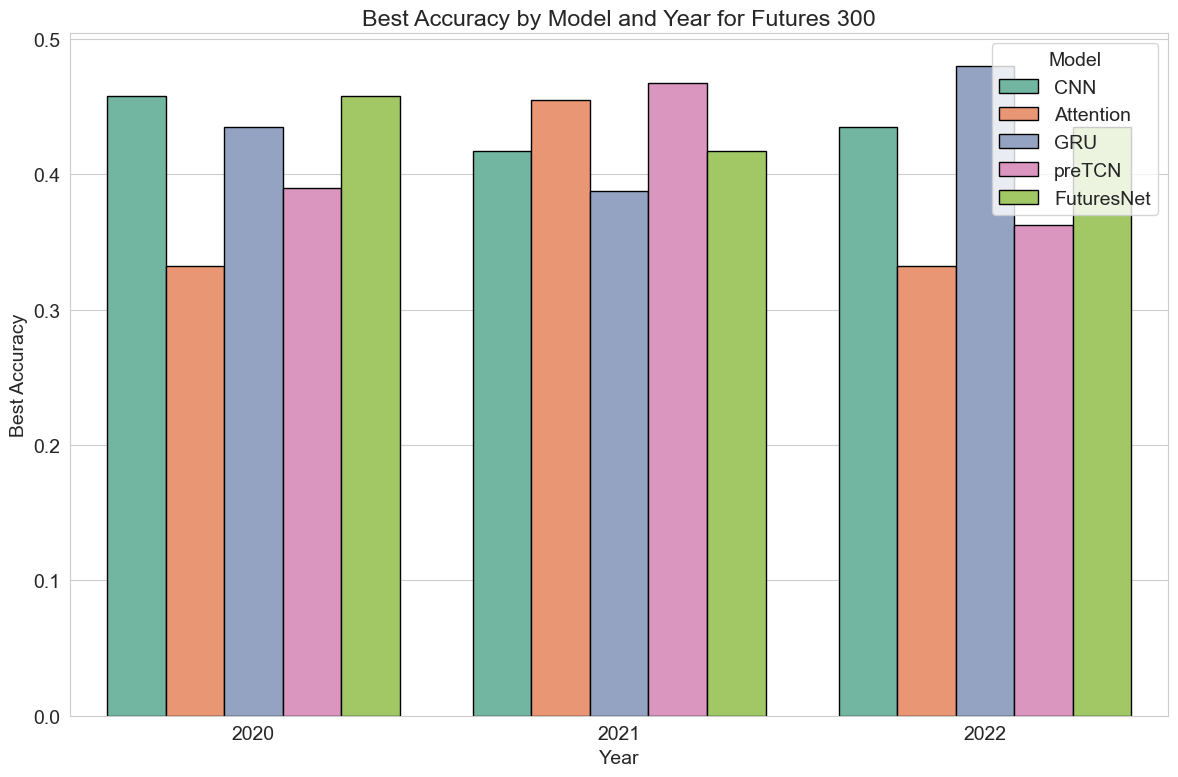

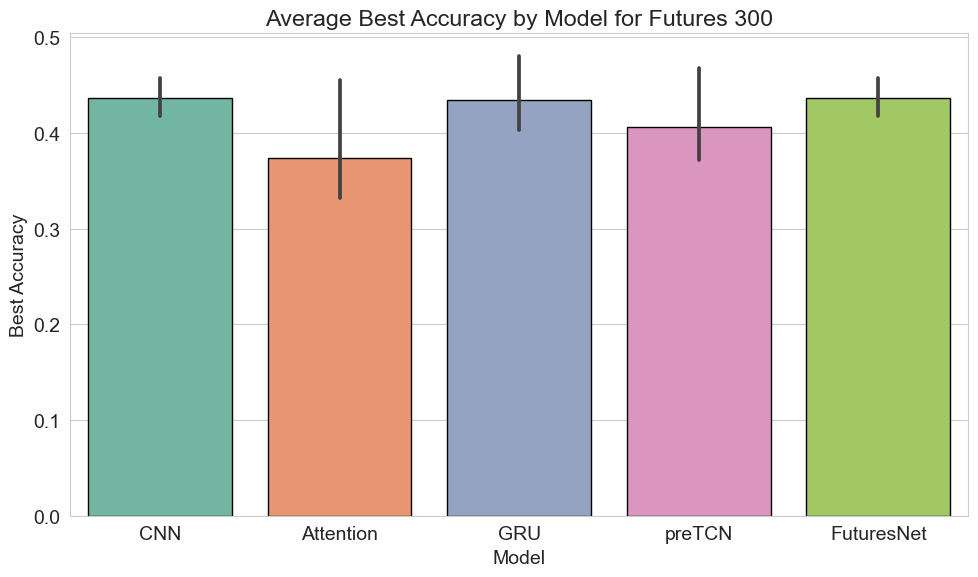

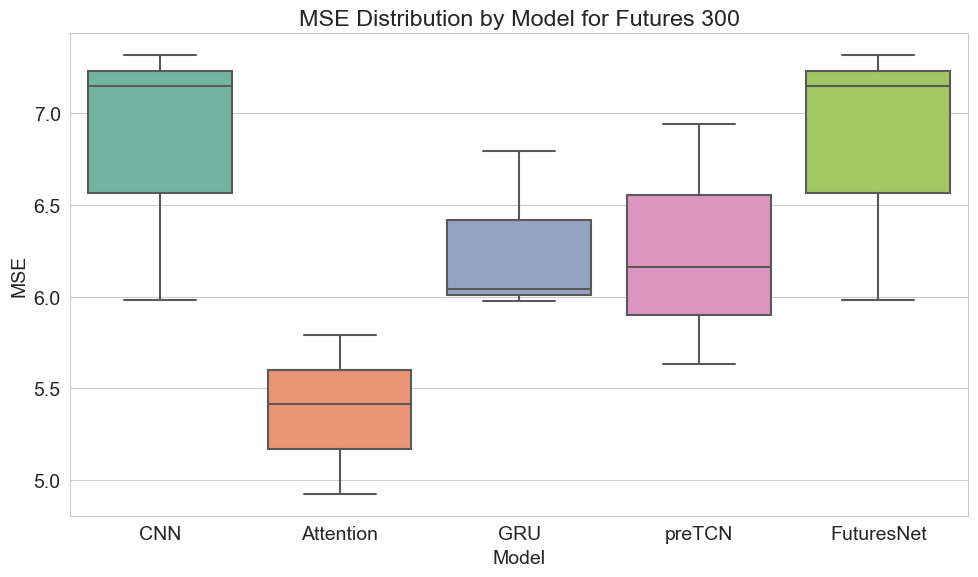

ANOVA result for Futures 300: F-statistic=1.06, p-value=0.4256
No significant difference found between models for Futures 300

--------------------------------------------------



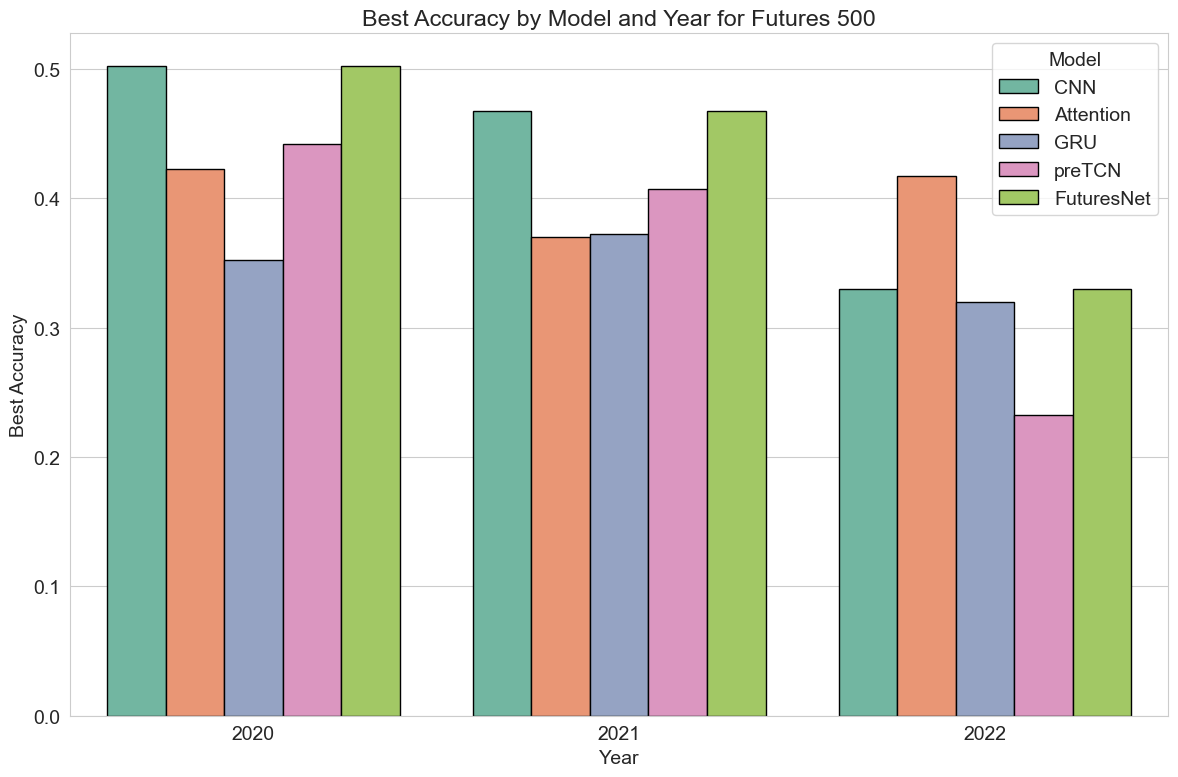

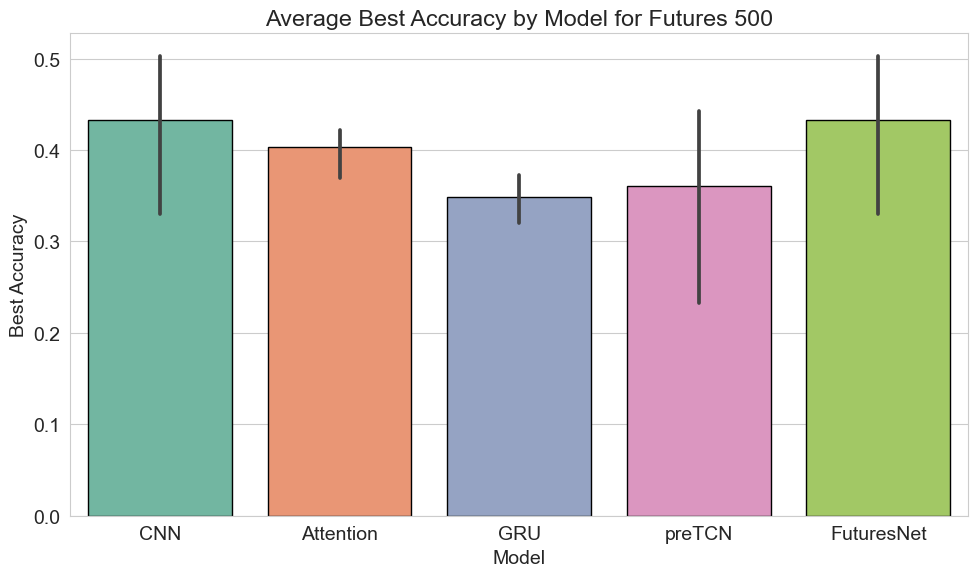

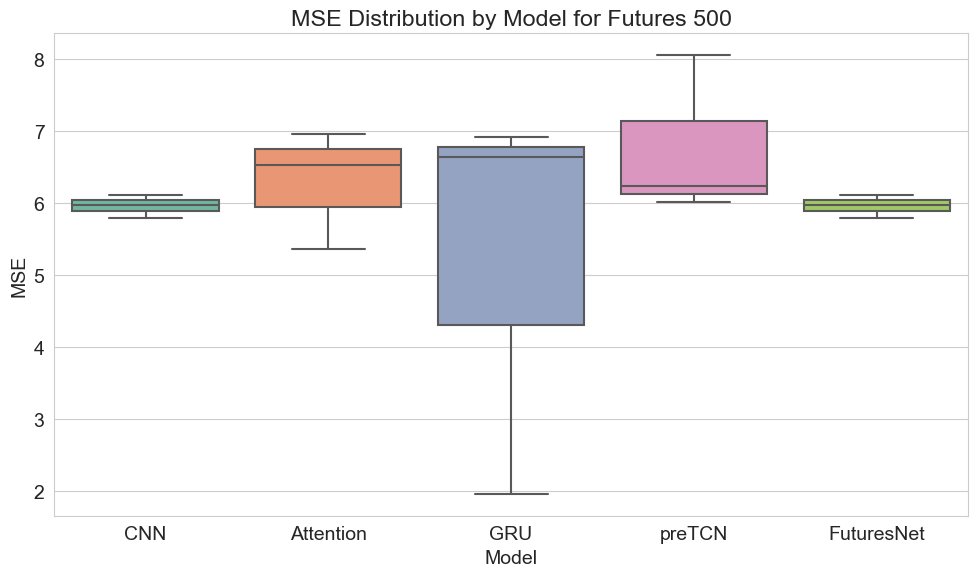

ANOVA result for Futures 500: F-statistic=0.77, p-value=0.5674
No significant difference found between models for Futures 500

--------------------------------------------------



In [31]:
for data_id in [50, 300, 500]:
    df_id = df[df['id'] == data_id]
    
    # 按年份归类的柱状图：各模型在不同年份的平均准确率
    plt.figure(figsize=(12, 8))
    sns.barplot(x="year", y="best_acc", hue="model", data=df_id, 
                hue_order=model_order, palette=palette, edgecolor='black')
    plt.title(f"Best Accuracy by Model and Year for Futures {data_id}")
    plt.ylabel("Best Accuracy")
    plt.xlabel("Year")
    plt.legend(title="Model", loc='upper right')
    plt.tight_layout()
    plt.savefig(f"best_acc_by_model_year_futures_{data_id}.png")
    plt.show()
    
    # 不按年份归类的柱状图：各模型的平均准确率
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y="best_acc", data=df_id, order=model_order, 
                palette=palette, edgecolor='black')
    plt.title(f"Average Best Accuracy by Model for Futures {data_id}")
    plt.ylabel("Best Accuracy")
    plt.xlabel("Model")
    plt.tight_layout()
    plt.savefig(f"average_best_acc_futures_{data_id}.png")
    plt.show()
    
    # 箱线图：各模型的 MSE 分布
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="model", y="mse", data=df_id, order=model_order, 
                palette=palette, showfliers=False, linewidth=1.5)
    plt.title(f"MSE Distribution by Model for Futures {data_id}")
    plt.ylabel("MSE")
    plt.xlabel("Model")
    plt.tight_layout()
    plt.savefig(f"mse_boxplot_futures_{data_id}.png")
    plt.show()
    
    # 显著性检验：比较不同模型的准确率是否有显著差异
    accuracies = [df_id[df_id['model'] == model]['best_acc'] for model in model_order]
    f_stat, p_value = f_oneway(*accuracies)
    print(f"ANOVA result for Futures {data_id}: F-statistic={f_stat:.2f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print("There is a significant difference between models for Futures", data_id)
    else:
        print("No significant difference found between models for Futures", data_id)
    print("\n" + "-"*50 + "\n")

In [32]:
new_file_path = './model_summary.csv'
new_model_summary_df = pd.read_csv(new_file_path)

# Display the first few rows to understand its structure
new_model_summary_df.head()

,year,id,model,best_acc,mae,mse,rmse,r2,val_loss,sharp_value
0,2020,50,Attention,0.295,1.915,6.070,2.463737,-1.526246,1.521630,0.000000
1,2020,50,CNN,0.320,1.105,1.955,1.398213,-0.000320,1.749058,1.770056
2,2020,50,GRU,0.550,1.420,5.080,2.253886,-0.658180,1.399777,-0.657371
3,2020,50,Inception,0.550,1.420,5.080,2.253886,-0.658180,1.399777,-0.657371
4,2020,50,FuturesNet,0.455,1.700,5.990,2.447448,-0.932258,1.338229,0.000000


In [37]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pandas as pd

# Load the model summary CSV file
file_path = './model_summary.csv'
model_summary_df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
model_summary_df.head()

# Create 'analyze' directory if it doesn't exist
output_dir = './analyze'
os.makedirs(output_dir, exist_ok=True)

# Define a function to create bar charts with proper configurations
def create_bar_chart(df, metric, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='model', y=metric, data=df, order=['CNN', 'GRU', 'Attention', 'Inception', 'FuturesNet'], edgecolor='black')
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), edgecolor='black')
    plt.close()

# Filter data for Futures ID 50
futures_50_df = model_summary_df[model_summary_df['id'] == 50]

# Create bar charts for 'best_acc' and 'val_loss' for Futures 50
create_bar_chart(futures_50_df, 'best_acc', 'Model Accuracy Comparison (Futures 50)', 'Best Accuracy', 'futures_50_accuracy.png')
create_bar_chart(futures_50_df, 'val_loss', 'Model Validation Loss Comparison (Futures 50)', 'Validation Loss', 'futures_50_val_loss.png')

# Display a message indicating that the images were created
os.listdir(output_dir)

['pie_futures_500_2022.png',
 'best_acc_year_futures_300.png',
 'pie_futures_50_2020.png',
 'futures_50_val_loss.png',
 'model_pie_chart_futures_300.png',
 'best_acc_futures_50.png',
 'pie_futures_50_2022.png',
 'pie_futures_300_2020.png',
 'model_pie_chart_futures_500.png',
 'best_acc_by_model_year_futures_500.png',
 'average_best_acc_futures_500.png',
 'pie_futures_300_2022.png',
 'pie_futures_50_2021.png',
 'pie_futures_500_2021.png',
 'accuracy_no_year.png',
 'pie_futures_500_2020.png',
 'best_acc_futures_300.png',
 'mse_distribution_comparison.png',
 'rmse_distribution_comparison.png',
 'rmse_trend.png',
 'mse_boxplot_futures_300.png',
 'mse_trend.png',
 'best_acc_futures_500.png',
 'mse_boxplot_futures_50.png',
 'average_best_acc_futures_50.png',
 'analyze.py',
 'mse_boxplot_futures_500.png',
 'best_acc_year_futures_500.png',
 'accuracy_trend.png',
 'mse_distribution.png',
 'accuracy_futures_500.png',
 'average_best_acc_futures_300.png',
 'accuracy_futures_50.png',
 'accuracy_by_

In [38]:
def create_box_plot(df, metric, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='model', y=metric, data=df, order=['CNN', 'GRU', 'Attention', 'Inception', 'FuturesNet'])
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), edgecolor='black')
    plt.close()

# Filter data for Futures IDs 50, 300, 500
futures_300_df = new_model_summary_df[new_model_summary_df['id'] == 300]
futures_500_df = new_model_summary_df[new_model_summary_df['id'] == 500]

# Create bar charts for 'best_acc' and 'val_loss' for Futures 300 and 500
create_bar_chart(futures_300_df, 'best_acc', 'Model Accuracy Comparison (Futures 300)', 'Best Accuracy', 'futures_300_accuracy.png')
create_bar_chart(futures_300_df, 'val_loss', 'Model Validation Loss Comparison (Futures 300)', 'Validation Loss', 'futures_300_val_loss.png')

create_bar_chart(futures_500_df, 'best_acc', 'Model Accuracy Comparison (Futures 500)', 'Best Accuracy', 'futures_500_accuracy.png')
create_bar_chart(futures_500_df, 'val_loss', 'Model Validation Loss Comparison (Futures 500)', 'Validation Loss', 'futures_500_val_loss.png')

# Create box plots for 'mae' for Futures 50, 300, and 500
create_box_plot(futures_50_df, 'mae', 'MAE Distribution Across Models (Futures 50)', 'Mean Absolute Error', 'futures_50_mae_boxplot.png')
create_box_plot(futures_300_df, 'mae', 'MAE Distribution Across Models (Futures 300)', 'Mean Absolute Error', 'futures_300_mae_boxplot.png')
create_box_plot(futures_500_df, 'mae', 'MAE Distribution Across Models (Futures 500)', 'Mean Absolute Error', 'futures_500_mae_boxplot.png')

# List the generated images
os.listdir(output_dir)


['pie_futures_500_2022.png',
 'best_acc_year_futures_300.png',
 'pie_futures_50_2020.png',
 'futures_50_val_loss.png',
 'model_pie_chart_futures_300.png',
 'best_acc_futures_50.png',
 'pie_futures_50_2022.png',
 'pie_futures_300_2020.png',
 'model_pie_chart_futures_500.png',
 'best_acc_by_model_year_futures_500.png',
 'average_best_acc_futures_500.png',
 'pie_futures_300_2022.png',
 'pie_futures_50_2021.png',
 'pie_futures_500_2021.png',
 'accuracy_no_year.png',
 'pie_futures_500_2020.png',
 'best_acc_futures_300.png',
 'mse_distribution_comparison.png',
 'rmse_distribution_comparison.png',
 'rmse_trend.png',
 'mse_boxplot_futures_300.png',
 'mse_trend.png',
 'best_acc_futures_500.png',
 'mse_boxplot_futures_50.png',
 'average_best_acc_futures_50.png',
 'analyze.py',
 'futures_500_val_loss.png',
 'mse_boxplot_futures_500.png',
 'best_acc_year_futures_500.png',
 'accuracy_trend.png',
 'mse_distribution.png',
 'futures_500_mae_boxplot.png',
 'futures_50_mae_boxplot.png',
 'accuracy_futur

In [39]:
latest_file_path = './model_summary.csv'
latest_model_summary_df = pd.read_csv(latest_file_path)

# Display the first few rows to understand its structure
latest_model_summary_df.head()

,year,id,model,best_acc,mae,mse,rmse,r2,val_loss,sharp_value
0,2020,50,Attention,0.295,1.915,6.070,2.463737,-1.526246,1.521630,0.000000
1,2020,50,CNN,0.320,1.105,1.955,1.398213,-0.000320,1.749058,1.770056
2,2020,50,GRU,0.550,1.420,5.080,2.253886,-0.658180,1.399777,-0.657371
3,2020,50,Inception,0.550,1.420,5.080,2.253886,-0.658180,1.399777,-0.657371
4,2020,50,FuturesNet,0.455,1.700,5.990,2.447448,-0.932258,1.338229,0.000000


In [44]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create the 'analyze' directory again if it doesn't exist
output_dir = './analyze'
os.makedirs(output_dir, exist_ok=True)

# Define the order of models as per instructions
model_order = ['CNN', 'GRU', 'Attention', 'Inception', 'FuturesNet']

# Function to create bar charts
def create_bar_chart(df, metric, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y=metric, data=df, order=model_order, edgecolor='black')
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), edgecolor='black')
    plt.show()
    plt.close()

# Function to create box plots
def create_box_plot(df, metric, title, ylabel, filename):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='model', y=metric, data=df, order=model_order)
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), edgecolor='black')
    plt.show()
    plt.close()

# Analyze each futures group (50, 300, 500) separately
futures_ids = [50, 300, 500]

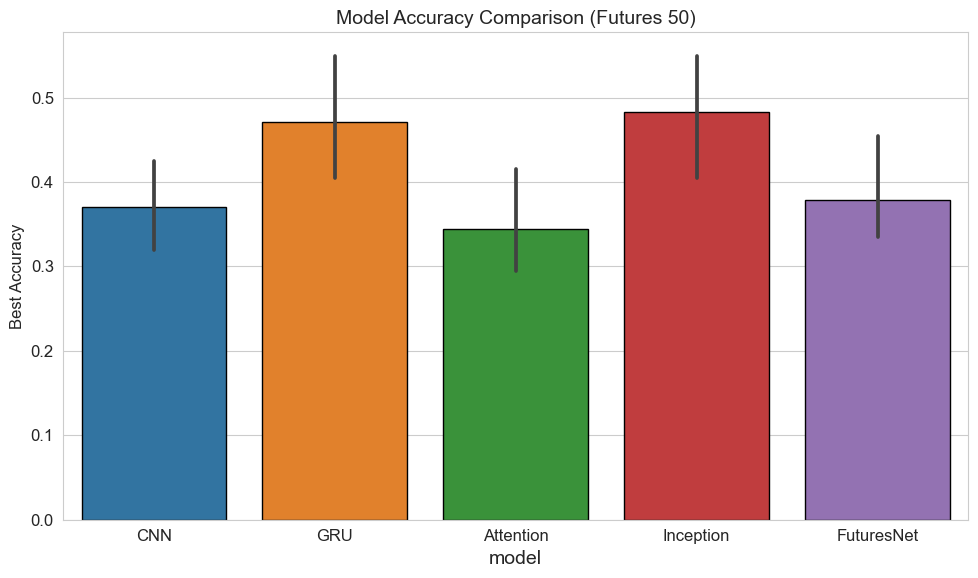

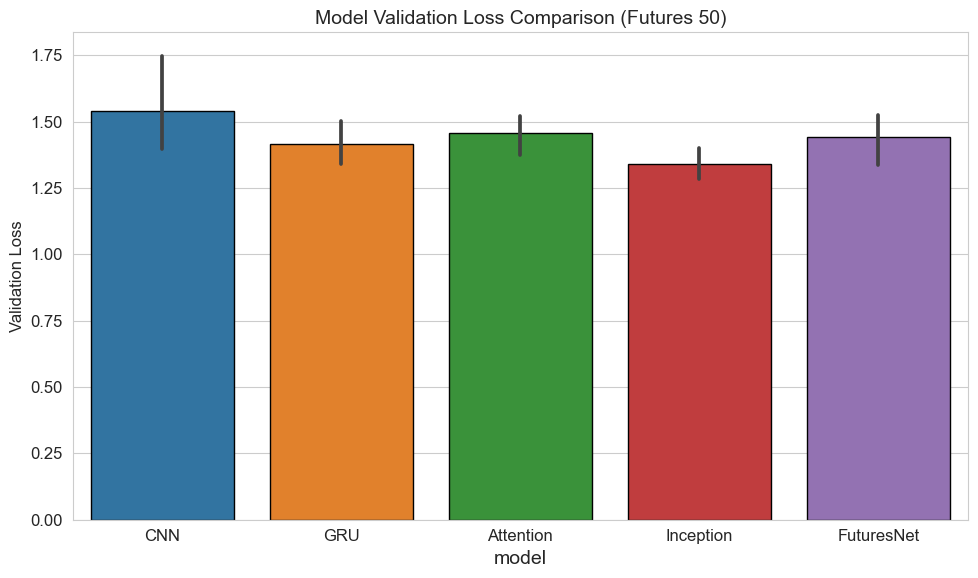

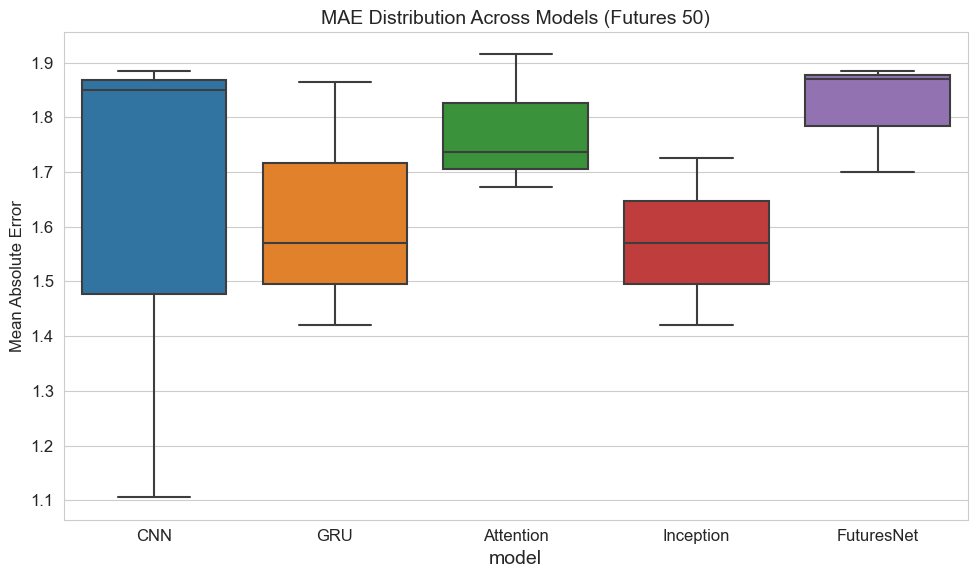

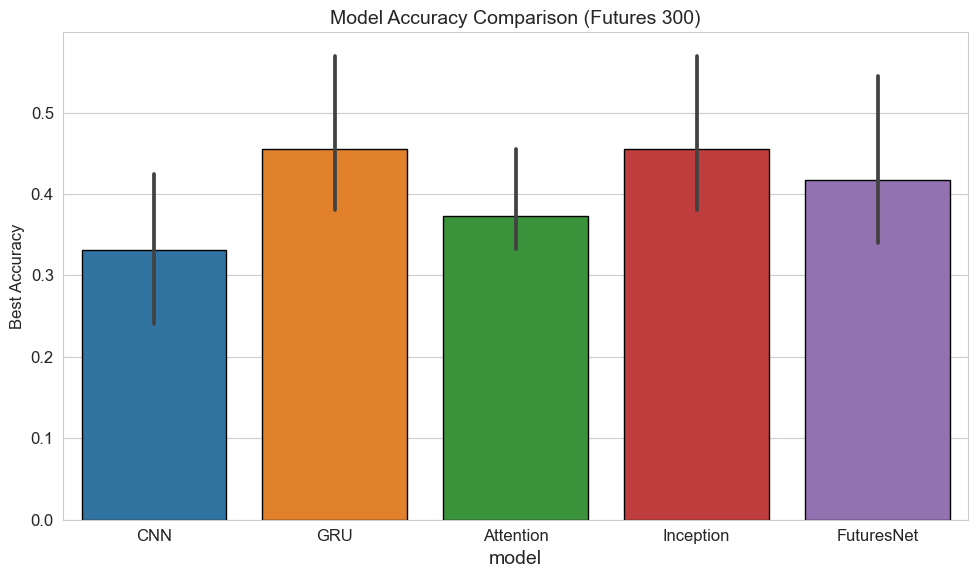

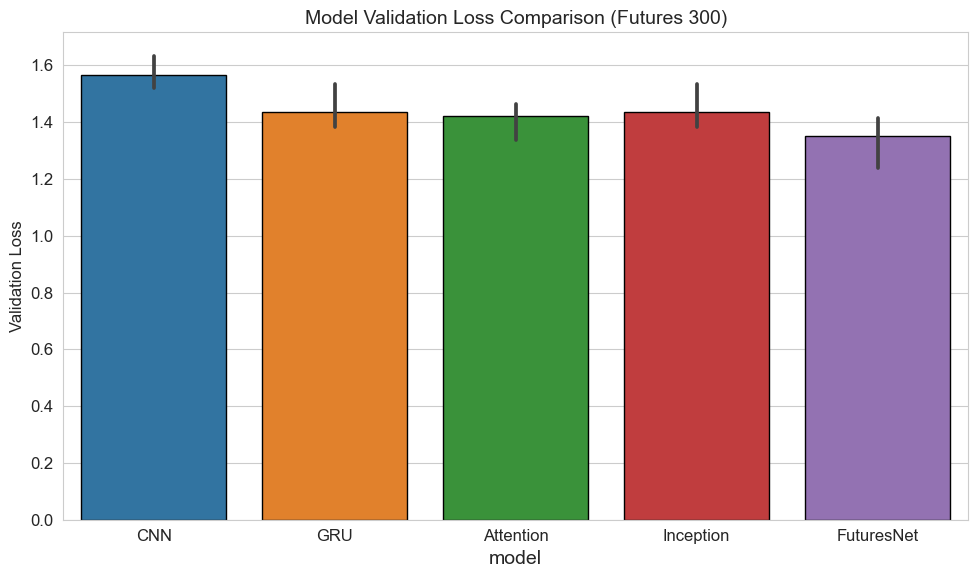

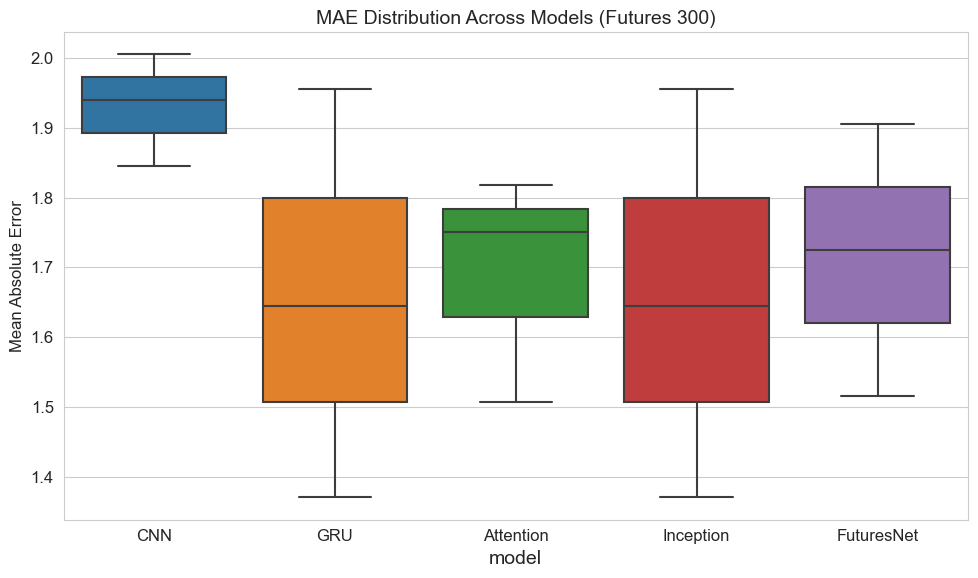

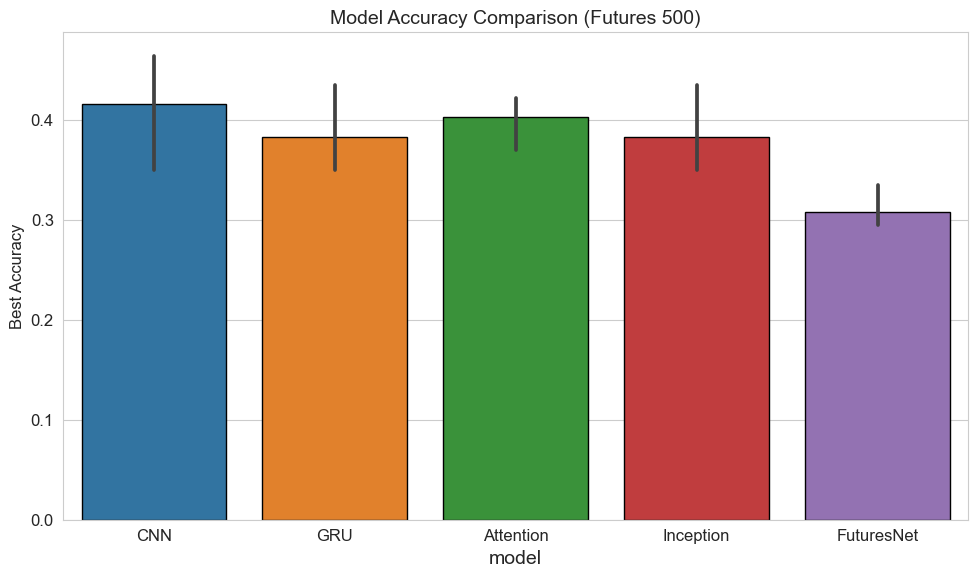

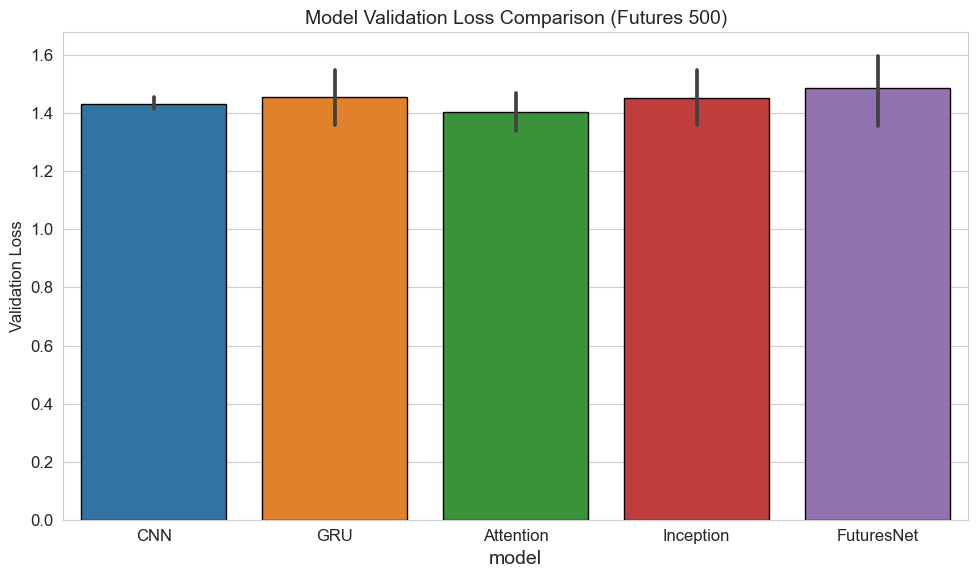

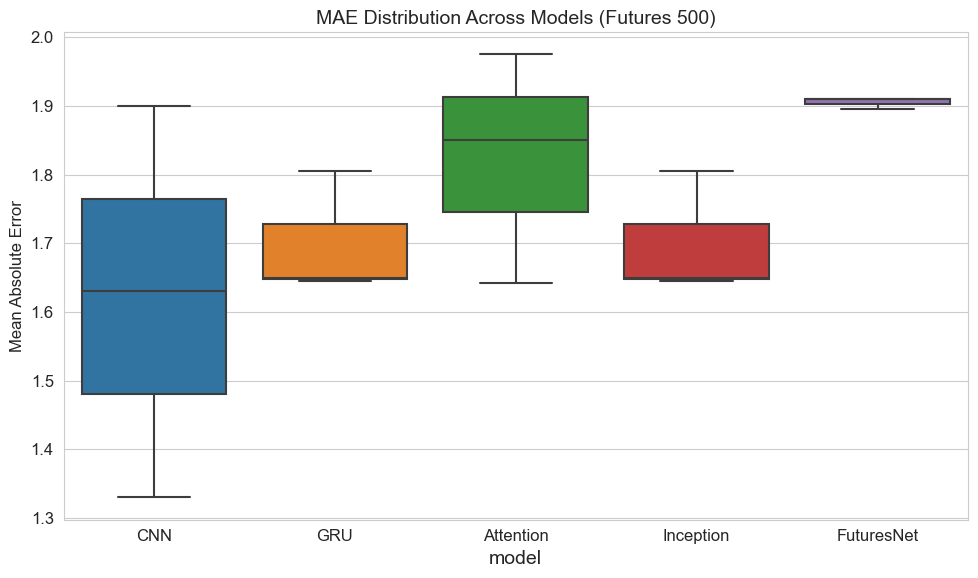

['pie_futures_500_2022.png',
 'best_acc_year_futures_300.png',
 'pie_futures_50_2020.png',
 'futures_50_val_loss.png',
 'model_pie_chart_futures_300.png',
 'best_acc_futures_50.png',
 'pie_futures_50_2022.png',
 'pie_futures_300_2020.png',
 'model_pie_chart_futures_500.png',
 'best_acc_by_model_year_futures_500.png',
 'average_best_acc_futures_500.png',
 'pie_futures_300_2022.png',
 'pie_futures_50_2021.png',
 'pie_futures_500_2021.png',
 'accuracy_no_year.png',
 'pie_futures_500_2020.png',
 'best_acc_futures_300.png',
 'mse_distribution_comparison.png',
 'rmse_distribution_comparison.png',
 'rmse_trend.png',
 'mse_boxplot_futures_300.png',
 'mse_trend.png',
 'best_acc_futures_500.png',
 'mse_boxplot_futures_50.png',
 'average_best_acc_futures_50.png',
 'analyze.py',
 'futures_500_val_loss.png',
 'mse_boxplot_futures_500.png',
 'best_acc_year_futures_500.png',
 'accuracy_trend.png',
 'mse_distribution.png',
 'futures_500_mae_boxplot.png',
 'futures_50_mae_boxplot.png',
 'accuracy_futur

In [45]:
for fid in futures_ids:
    futures_df = latest_model_summary_df[latest_model_summary_df['id'] == fid]

    # Create bar charts for accuracy and validation loss for each future
    create_bar_chart(futures_df, 'best_acc', f'Model Accuracy Comparison (Futures {fid})', 'Best Accuracy', f'futures_{fid}_accuracy.png')
    create_bar_chart(futures_df, 'val_loss', f'Model Validation Loss Comparison (Futures {fid})', 'Validation Loss', f'futures_{fid}_val_loss.png')

    # Create box plots for mae for each future
    create_box_plot(futures_df, 'mae', f'MAE Distribution Across Models (Futures {fid})', 'Mean Absolute Error', f'futures_{fid}_mae_boxplot.png')

# List the generated images
os.listdir(output_dir)